# HOPUS

HOPUS (**HO**using **P**ricing **U**tilitie**S**) contains a variety of routines used to predict real estate prices.

This notebook highlights what HOPUS can do, namely
- clean the raw data,
- perform exploratory analysis of the data,
- train a variety of models for the prediction of real estate prices, and
- evaluate the performance of these models.

## Technical preliminaries

First we clone the HOPUS repo to have access to all the data and routines therein.

In [1]:
!git clone https://github.com/aremondtiedrez/hopus.git
%cd hopus

Cloning into 'hopus'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 99 (delta 38), reused 78 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (99/99), 602.11 KiB | 2.54 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/hopus


We can now import the requisite modules from HOPUS.

In [2]:
import preprocessing

## Problem: Real estate prices vary over time

Predicting how real estate prices vary over time is a valuable and complicated endeavour that requires accounting for the evolution of macro-economic phenomena such as mortgage rates, housing supply, public policy, and good ole' demographics.

HOPUS is *not* built to do that. Instead, the focus of HOPUS is on predicting the sale price of a home given the *characteristics* of that home. Nonetheless, home prices in the U.S. grown at a rate of about 5\% a year for the past 30 years, so clearly accounting for *when* a home is bought or sold is crucial in estimating its price accurately.

Thankfully, Standard & Poor's publishes, every month, an index tracking the price of single-family homes in the U.S. We will use this index to, admittedly coarsely, account for the temporal variation in home prices.

In [3]:
# Load the home price index as a pandas DataFrame
hpi = preprocessing.home_price_index.load()

In [10]:
# Inspect the raw home price index
hpi

,trueValue,availableValue
date,,
1987-04,64.972,63.732
1987-05,65.546,64.131
1987-06,66.217,64.467
1987-07,66.785,64.972
1987-08,67.268,65.546
...,...,...
2025-06,331.627,327.747
2025-07,330.986,329.915
2025-08,329.885,331.439


In [6]:
# Preprocess the home price index
preprocessing.home_price_index.preprocess(hpi)

In [8]:
# Inspect the processed home price index
hpi

,trueValue,availableValue
date,,
1987-04,64.972,63.732
1987-05,65.546,64.131
1987-06,66.217,64.467
1987-07,66.785,64.972
1987-08,67.268,65.546
...,...,...
2025-06,331.627,327.747
2025-07,330.986,329.915
2025-08,329.885,331.439


<Axes: xlabel='date'>

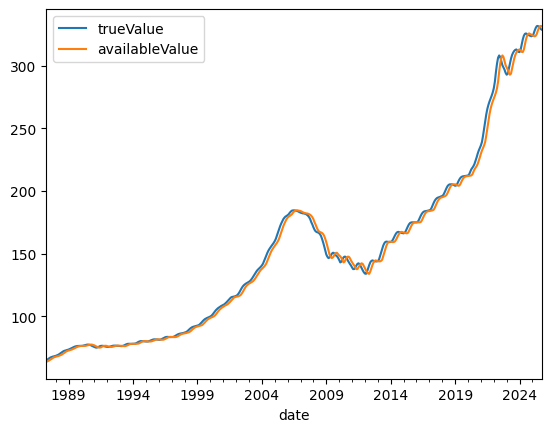

In [9]:
hpi.plot()